In [1]:
from src import genetic_algorithm,differential_evolution,nsde
from src.repository.mutation import  PolynomialM
from src.repository.cross_over import SimulatedBC
from src.repository.population import RealP
from src.repository.selection import RandomSelection
from src.repository.encoding import RealEncoding
from src.repository.cross_over import DECrossOver
from src.repository.selection import DESelection
from src.repository.selection import BinaryTS
from src.repository.mutation import DEMutation
from src.repository.population import RealPMO
from src.repository.selection import BinaryTSMO
from src.nsga import NSGAII
from src.repository.selection import DESelectionMO
import math
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from pymoo.problems import get_problem

In [2]:


def plot_pareto_front(front, objectives, title="Pareto-optimal Front", labels=None,m=2):

  fig, ax = plt.subplots()

  x = []
  y = []
  for solution in front:
    objective_values = objectives(solution.value)
    x.append(objective_values[0])
    y.append(objective_values[1])
  ax.plot(x, y, 'o-', markersize=3, label=f'Front {len(front)}')

  ax.set_xlabel(labels[0])
  ax.set_ylabel(labels[1])
  ax.set_title(title)
  ax.legend()
  plt.show()


In [3]:
def plot_single_view(ax, front, objectives, labels, title):
    x = []
    y = []
    z = []
    for solution in front:
        objective_values = objectives(solution.value)
        x.append(objective_values[0])
        y.append(objective_values[1])
        z.append(objective_values[2])

    ax.scatter(x, y, z, marker='o', label=f'Front {len(front)}')
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.set_title(title)
    ax.legend()

def plot_pareto_front_3d(front, objectives, title="Pareto-optimal Front", labels=None, m=3):
    fig = plt.figure(figsize=(15, 5))

    # Plot 1: Original View
    ax1 = fig.add_subplot(131, projection='3d')
    plot_single_view(ax1, front, objectives, labels, title)

    # Plot 2: Different Angles 1
    ax2 = fig.add_subplot(132, projection='3d')
    plot_single_view(ax2, front, objectives, labels, title)
    ax2.view_init(elev=20, azim=30)  # Set custom viewing angles

    # Plot 3: Different Angles 2
    ax3 = fig.add_subplot(133, projection='3d')
    plot_single_view(ax3, front, objectives, labels, title)
    ax3.view_init(elev=45, azim=-30)  # Set custom viewing angles

    display(fig)

In [8]:


def get_bounds(problem_name):

    problem = get_problem(problem_name)
    bounds = [(problem.xl[i], problem.xu[i]) for i in range(problem.n_var)]
    return bounds

def problem(x):
    x = np.array(x)
        
    problem = get_problem('dtlz1')
    fitness_values = problem.evaluate(x)

    return fitness_values

In [9]:
population = RealPMO()  
encoding = RealEncoding(bounds=get_bounds('dtlz1'))  


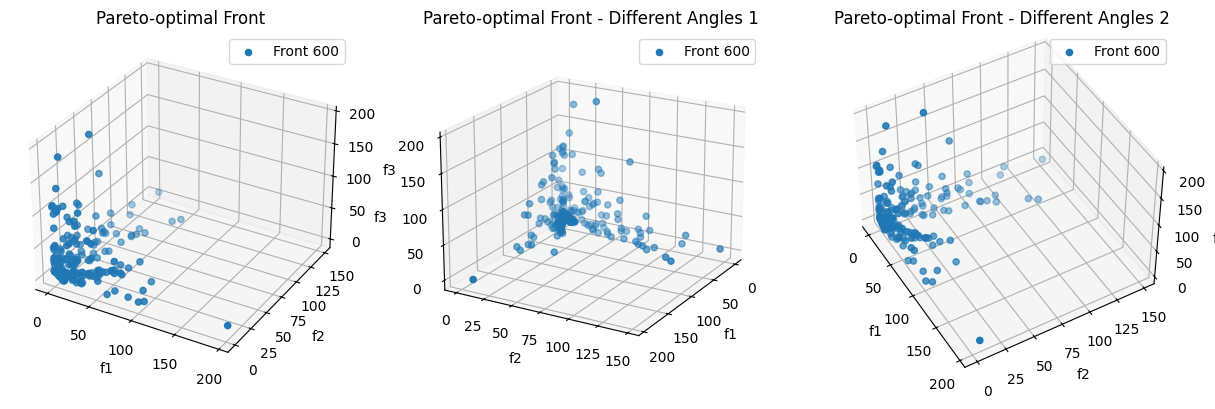

In [19]:

ga_config = genetic_algorithm.GAConfig(n_pop=300, n_iter=400, minimize=True)
crossover = SimulatedBC(r_cross=1) 
mutation = PolynomialM(r_mut=1/7) 
selection = BinaryTSMO()  
nsga = NSGAII(cross_over=crossover, mutation=mutation, population=population, encoding=encoding, selection=selection, config=ga_config)
results = nsga.run(problem)





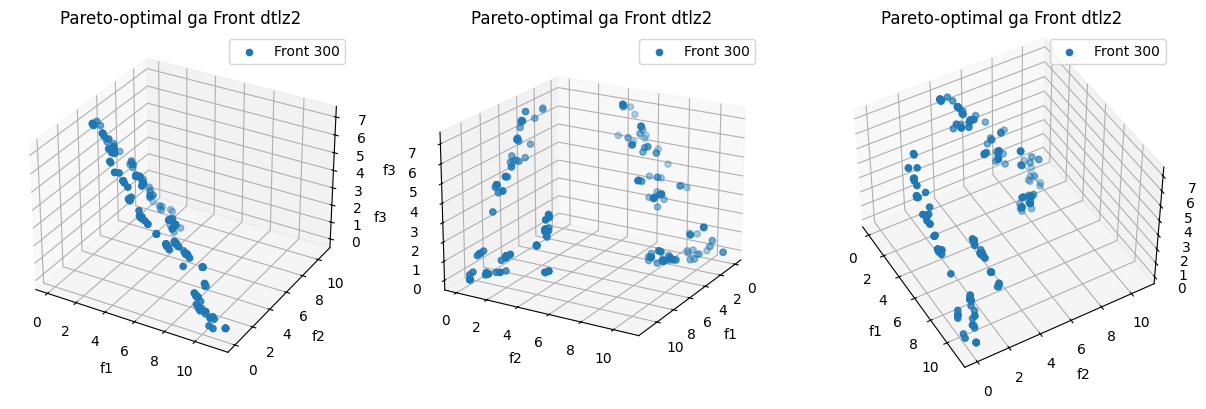

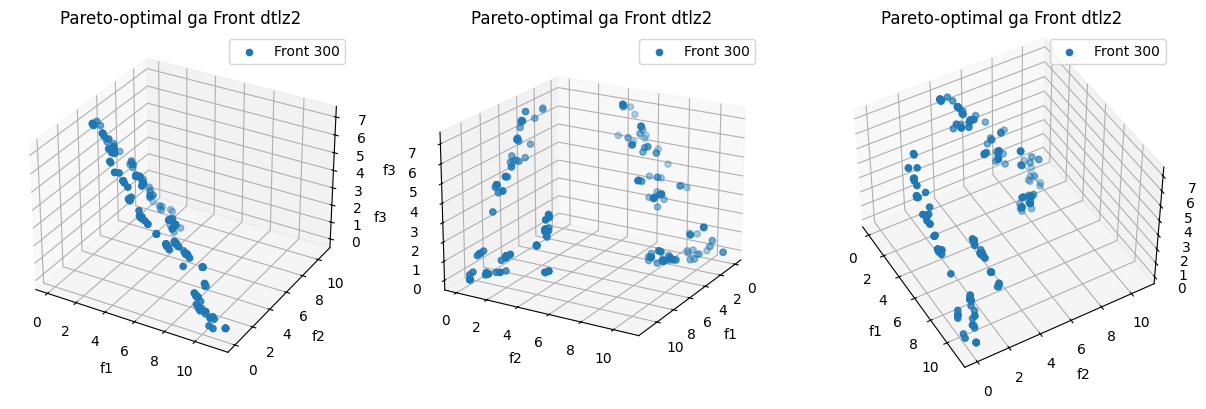

In [20]:
plot_pareto_front_3d(results, problem, title='Pareto-optimal ga Front '+'dtlz2', labels=['f1', 'f2','f3'])

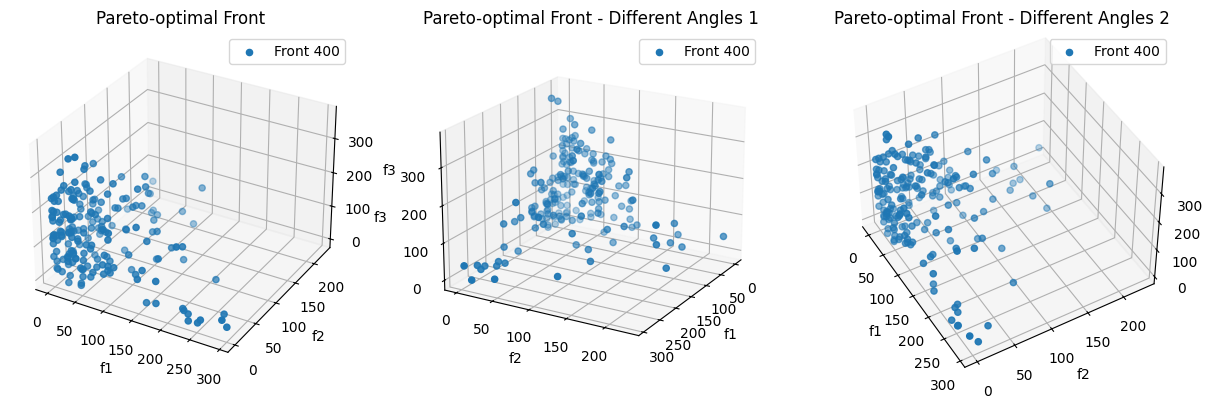

In [12]:
de_cross =  DECrossOver()
de_selection =  DESelectionMO()
de_mutation =  DEMutation(r_mut=0.45)
de_config = differential_evolution.DEConfig(n_pop=200,n_iter=200)
nsdeii = nsde.NSDEII(cross_over=de_cross,mutation=de_mutation,population=population,encoding=encoding,selection=de_selection,config=de_config)

result_de = nsdeii.run(problem)

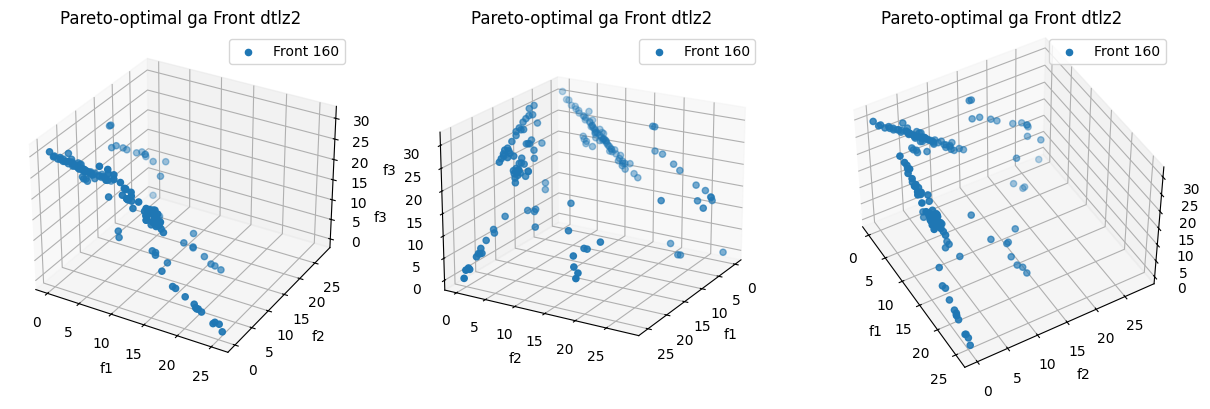

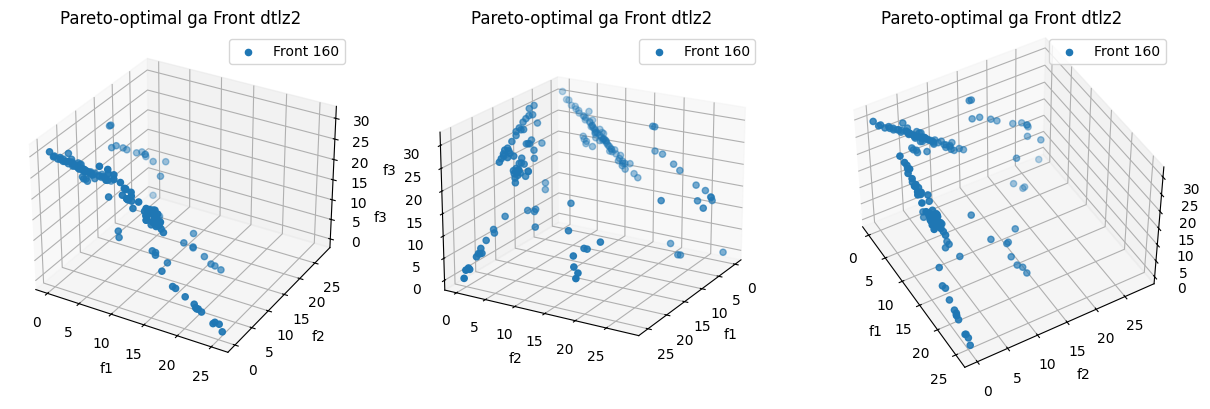

In [13]:
plot_pareto_front_3d(result_de, problem, title='Pareto-optimal ga Front '+'dtlz2', labels=['f1', 'f2','f3'])